# Classification of Hyperspectral Images (HSI) 

This notebook uses [hsi_env](../../environments/hsi_env.yml) conda environment for running. Take a look in [README](../../environments/README.md) for details.

This notebook uses AVIRIS Indian Pine dataset for running. Take a look in [README](../../Datasets/IndianPines/README.md) for details.
  
- Tutorial: 
  - [Reading and Visualizing GeoTiff | Satellite Images with Python](https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510)
  - [Hyperspectral Image Analysis — Classification](https://towardsdatascience.com/hyperspectral-image-analysis-classification-c41f69ac447f)
  - [Hyperspectral Image Classification](https://www.intechopen.com/chapters/70188)

In [52]:
import sys
print(sys.executable)
print(sys.version)

e:\ProgramData\Anaconda3\envs\hsi_env\python.exe
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [53]:
import numpy as np
from scipy import io
from sklearn import metrics
import spectral

import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load Data

In [54]:
data_folder = "Data/"

Pure_TrSet = io.loadmat(data_folder + 'Pure_TrSet.mat')
Mixed_TrSet = io.loadmat(data_folder + 'Mixed_TrSet.mat')

TrLabel = io.loadmat(data_folder + 'TrLabel.mat')
TeLabel = io.loadmat(data_folder + 'TeLabel.mat')

Pure_TrSet, Mixed_TrSet = Pure_TrSet['Pure_TrSet'], Mixed_TrSet['Mixed_TrSet']
TrLabel, TeLabel = TrLabel['TrLabel'], TeLabel['TeLabel']

In [55]:
print(Pure_TrSet.shape, Mixed_TrSet.shape)
print(TrLabel.shape, TeLabel.shape)

Mixed_TrSet = Mixed_TrSet.reshape(200, 200, Mixed_TrSet.shape[1])
print(Mixed_TrSet.shape)

(8000, 224) (40000, 224)
(8000, 5) (40000, 5)
(200, 200, 224)


### 1. 2 Load synthetic data 

In [56]:
synthetic_data = io.loadmat("Data/synthetic_data_1.mat")
synthetic_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'M', 'p', 'm', 'n', 'L', 'A_true', 'psi_r', 'X', 'S', 'noise'])

In [57]:
synthetic_data['X'].shape

(40000, 224)

In [58]:
img = synthetic_data['X']
img = img.reshape(200, 200, img.shape[1])

# For no. of bands and resolution
(nrows, ncols, nbands) = img.shape
print(img.shape)
# print("\n".join(["Bands:\t"+str(nbands),"Rows:\t"+str(nrows),"Cols:\t"+str(ncols)]))

(200, 200, 224)


In [59]:
hi_res = io.loadmat("hi_res.mat")
hi_res = hi_res["hi_res"]
print(hi_res.shape)

(200, 200, 224)


In [60]:
def norm_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

norm_hi_res = norm_data(hi_res)

(-0.5, 199.5, 199.5, -0.5)

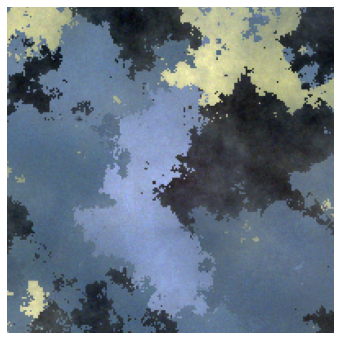

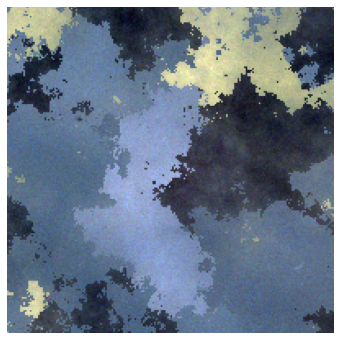

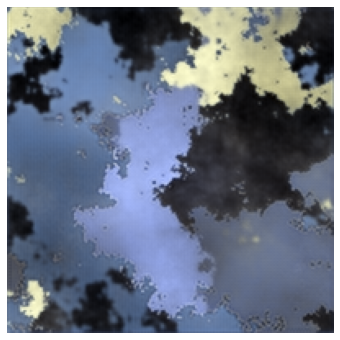

In [61]:
bands=(30, 20, 10)

spectral.imshow(img, bands=bands, figsize=(6, 6) )
plt.grid(False) 
plt.axis('off')

spectral.imshow(Mixed_TrSet, bands=bands, figsize=(6, 6) )
plt.grid(False) 
plt.axis('off')

v = spectral.imshow(norm_hi_res, bands=bands, figsize=(6, 6) )
plt.grid(False) 
plt.axis('off')

In [62]:
# ", ".join( map( str, Mixed_TrSet[:,:,10].flatten() ) ) 
# ", ".join( map( str, hi_res[:,:,10].flatten() ) )

In [63]:
rmse, mae = [], []
for i in range(hi_res.shape[2]):
    rmse.append(metrics.mean_squared_error(Mixed_TrSet[:,:,i].flatten(), hi_res[:,:,i].flatten()))
    mae.append(metrics.mean_absolute_error(Mixed_TrSet[:,:,i].flatten(), hi_res[:,:,i].flatten()))

print("rmse:", sum(rmse)/len(rmse) )  #, sorted(rmse, reverse=True) )
print("mae:", sum(mae)/len(mae) )     #, sorted(mae, reverse=True) )

rmse: 0.0014105490671038226
mae: 0.028436257068898935


## 2. Load abundance

In [64]:
n_img = io.loadmat(r"abund.mat")
n_img = n_img['abund']
print(n_img.shape)

n_img = n_img.reshape(200, 200, 5)
print(n_img.shape)

(40000, 5)
(200, 200, 5)


In [65]:
A_true = synthetic_data['A_true']
print(A_true.shape)

A_true = A_true.reshape(200, 200, 5)
print(A_true.shape)

(40000, 5)
(200, 200, 5)


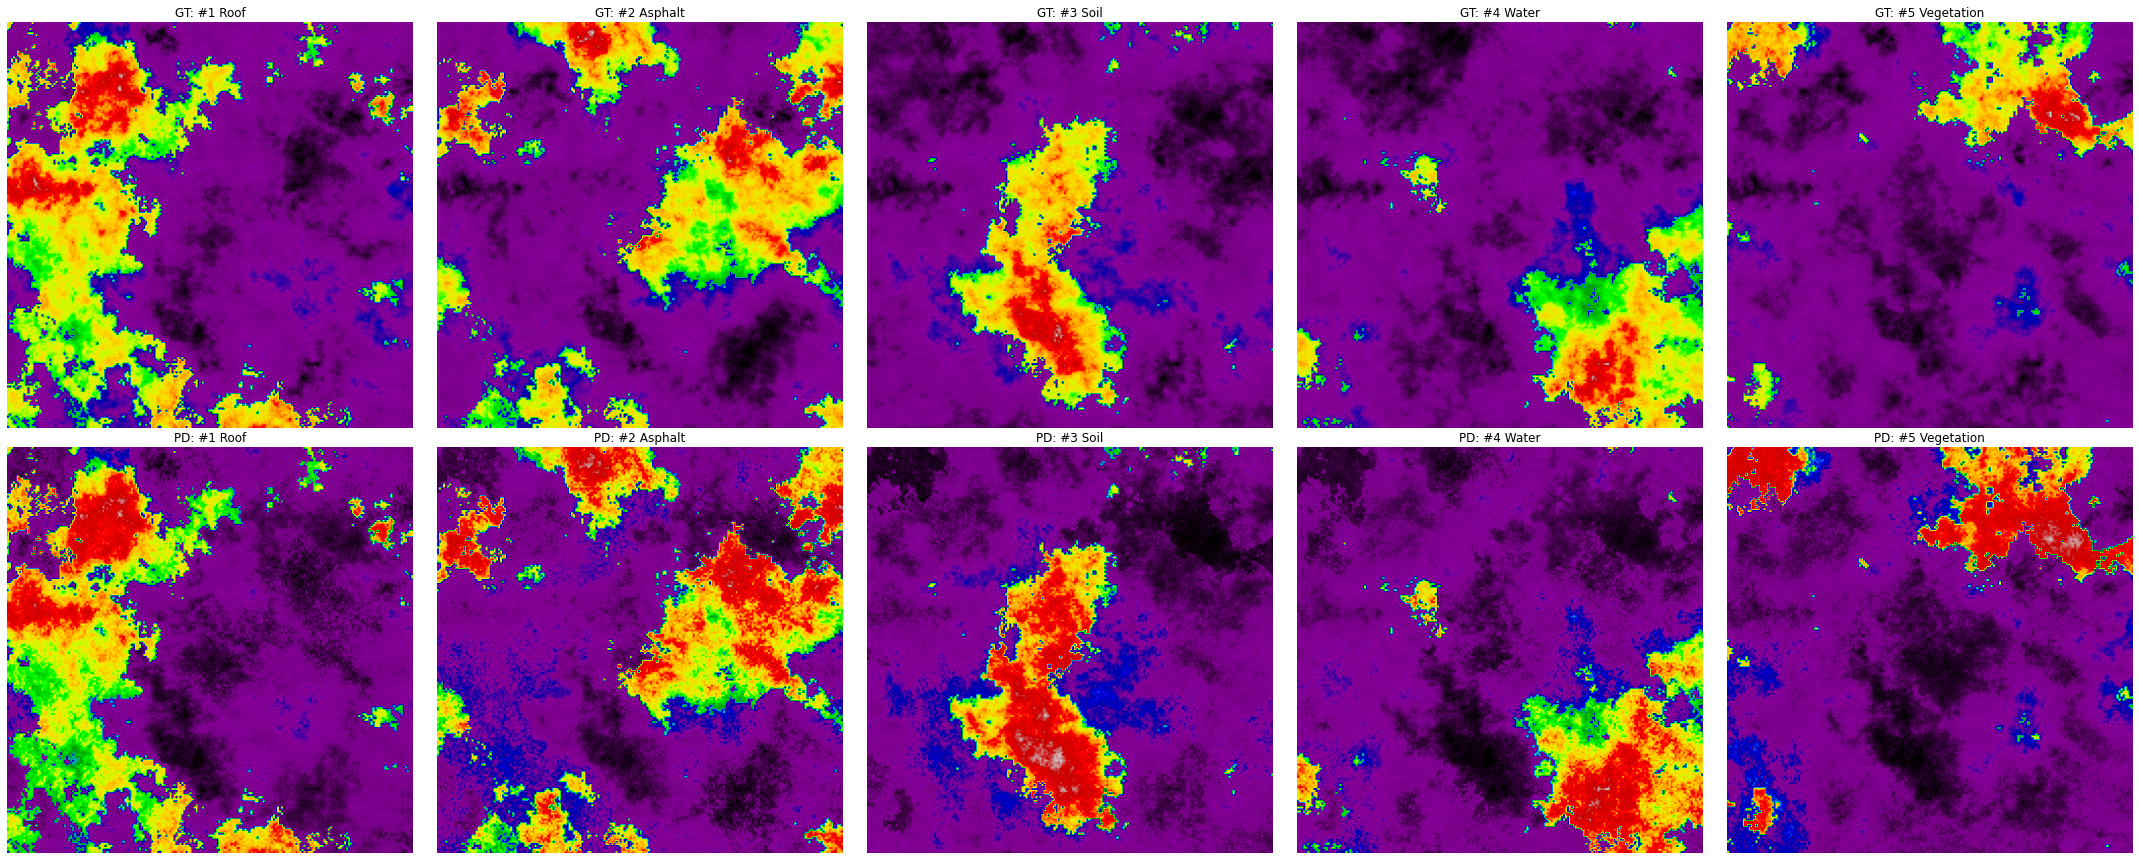

In [66]:
titles = ["#1 Roof", "#2 Asphalt", "#3 Soil", "#4 Water", "#5 Vegetation"]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (30, 12) )

for i in range(n_img.shape[2]):
    axes[0][i].imshow(A_true[:,:,i], cmap='nipy_spectral')
    
    axes[0][i].grid(False) 
    axes[0][i].axis('off')
    axes[0][i].set_title(f"GT: {titles[i]}")
    
    axes[1][i].imshow(n_img[:,:,i], cmap='nipy_spectral')
    
    axes[1][i].grid(False) 
    axes[1][i].axis('off')
    axes[1][i].set_title(f"PD: {titles[i]}")

fig.tight_layout()

In [67]:
rmse, mae = [], []
for i in range(n_img.shape[2]):
    rmse.append(metrics.mean_squared_error(A_true[:,:,i].flatten(), n_img[:,:,i].flatten()))
    mae.append(metrics.mean_absolute_error(A_true[:,:,i].flatten(), n_img[:,:,i].flatten()))

print("rmse:", sum(rmse)/len(rmse), rmse )
print("mae:", sum(mae)/len(mae), mae )

rmse: 0.001163781488080479 [0.002306654140659437, 0.0009676112197786523, 0.0007523912031581525, 0.0005715347505158132, 0.00122071612629034]
mae: 0.02363010183193438 [0.033542730395915085, 0.02427613837018187, 0.020866131082842118, 0.018203930197194584, 0.021261579113538237]


## Training report

(-0.5, 1232.5, 467.5, -0.5)

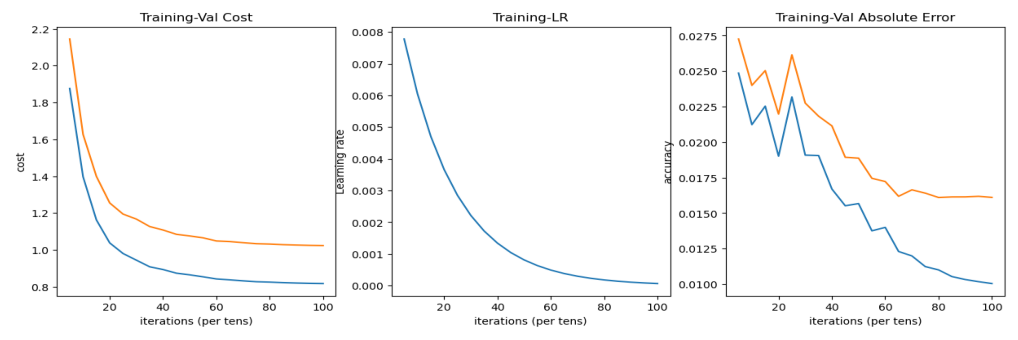

In [68]:
report = plt.imread('Training-Val-Report.png')

plt.figure(figsize = (18, 6))
plt.imshow(report, aspect='auto')
plt.axis(False) 